In [ ]:
# Import required libraries
import os
import cv2
import pandas as pd
import numpy as np

# Define paths
base_path = "/content/drive/MyDrive/data"

# Initialize lists
data = []
labels = []

# Define image size
image_size = (64, 64)  # Resize images to this size

# Process images with color space conversion
for label in os.listdir(base_path):  # Each folder is a class label
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                # Read the image in color (BGR format)
                img = cv2.imread(file_path)
                if img is None:
                    continue

                # Resize the image
                img = cv2.resize(img, image_size)

                #Lab Color Space (a and b Channels)
                lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
                a_channel = lab_img[:, :, 1]  # Green-Red
                b_channel = lab_img[:, :, 2]  # Blue-Yellow

                a_channel_normalized = a_channel / 255.0
                b_channel_normalized = b_channel / 255.0

                #combine a and b channels
                combined_lab = np.dstack((a_channel_normalized, b_channel_normalized)).flatten()


                # Append features tp the data
                data.append(combined_lab)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Create a DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Save to a CSV file
df.to_csv("flower_classification_data.csv", index=False)

# features and target


In [ ]:
# split the dataframe into X (features) and y (target)
X = df.drop(columns=['label'])
y=df["label"]

>>>>


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

# Split the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# knn classifier with 15 n_neghbors to reduce the overfit and using brute algorithm beacuase the data has 500+ features (High-Dimensional Data)
knn = KNeighborsClassifier(n_neighbors=15,algorithm="brute")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=15)

accuracy

In [ ]:
## Accuracy score of the KNN Classifier

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print(f"train accuracy: {accuracy_score(y_train,y_train_pred_knn)}\ntest accuracy: {accuracy_score(y_test,y_test_pred_knn)}")

train accuracy: 0.44642857142857145
test accuracy: 0.43169398907103823


# Calculating the evaluation matrics

In [ ]:
report_knn = classification_report(y_test, y_test_pred_knn)
print(report_knn)
recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
print(f"KNN Recall: {recall_knn:.4f}")
precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
print(f"KNN Precision: {precision_knn:.4f}")
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

              precision    recall  f1-score   support

           0       1.00      0.19      0.32        32
           1       0.27      0.76      0.39        34
           2       0.00      0.00      0.00        41
           3       0.56      0.62      0.59        47
           4       0.67      0.62      0.64        29

    accuracy                           0.43       183
   macro avg       0.50      0.44      0.39       183
weighted avg       0.47      0.43      0.38       183

KNN Recall: 0.4317
KNN Precision: 0.4730
KNN Accuracy: 0.43169398907103823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# Confusion matrix

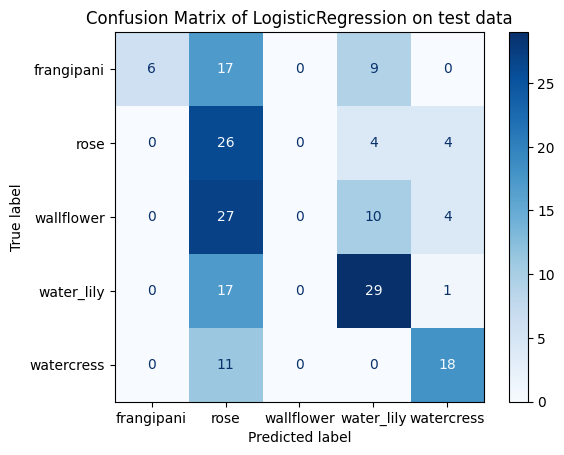

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes=label_encoder.classes_
# Create confusion matrix for the training data of the Logistic regression
cm = confusion_matrix(y_test, y_test_pred_knn)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of LogisticRegression on test data")
plt.show()

# ROC Curve and AUC values

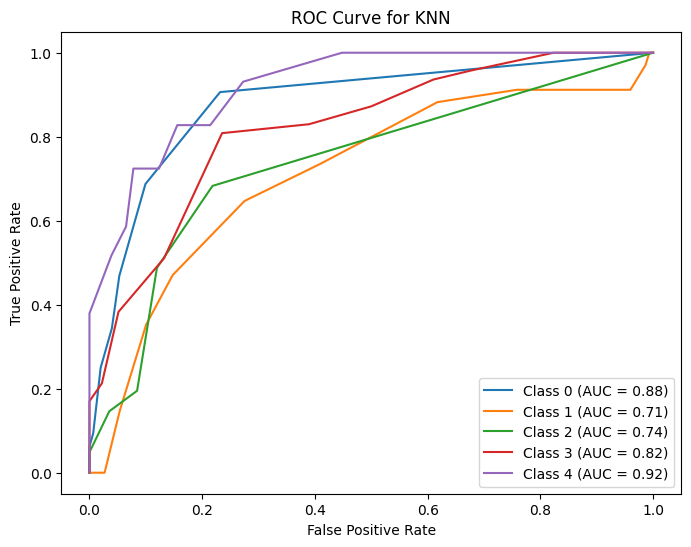

Average AUC: 0.81
Loss: 0.0


In [ ]:
y_prob_knn = knn.predict_proba(X_test)
# Binarize the labels for multi-class ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
# ploting the roc curve for each class and claculate the auc (area under curve)
plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    auc_value = roc_auc_score(y_test_bin[:, i], y_prob_knn[:, i])
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {auc_value:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

auc_value_overall = roc_auc_score(y_test_bin, y_prob_knn, multi_class='ovr', average='weighted')
print(f"Average AUC: {auc_value_overall:.2f}")
loss = log_loss(y_test, y_prob_knn , labels=classes)
print("Loss:", loss)